(lesson11.2)=
# Lesson November 14th


During today's lesson it's demonstrated how you to use the displacement method.

## Demonstration transforming stresses and Circle of Mohr

Given the following structure and cross section.

```{figure} intro_data/structure.svg
:align: center
```

We'll find the maximum stresses in point $\text{E}$ in cross-section $\text{A}$.

### Internal forces
First, let's find the internal forces:

```{figure} intro_data/Mline.svg
:align: center
```

```{figure} intro_data/Vline.svg
:align: center
```

At cross-section $\text{A}$ this gives a moment of $-14.6 \text{ kNm}$ and shear force of $+16 \text{ kN}$.

### Cross-sectional properties

For this thin-walled cross-section, the second moment of area of the cross-section can be calculated with:

$$ I_\text{zz} = 2 \cdot \cfrac{1}{12} \cdot 4 \cdot 300 ^3 + 2 \cdot \left(\cfrac{1}{12} \cdot 100 \cdot 12^3 + 12 \cdot 100 \cdot 150^2 \right) = 72.0288 \cdot 10^6 \text{ mm}^4$$

### Normal and shear stresses

The normal stresses can be calculated as:

$$\sigma_\text{E} = \cfrac{-14600 \cdot -0.075}{72.0288 \cdot 10^{-6}} \approx +15 \cdot 10^6 \text{ Pa}$$

$$\sigma_\text{max} = \cfrac{-14600 \cdot -0.150}{72.0288 \cdot 10^{-6}} \approx +30 \cdot 10^6 \text{ Pa}$$

Leading to the following diagram:

```{figure} intro_data/normall_stress.svg
:align: center
```

The shear forces can be calculated as:

$$\sigma_\text{xm,max flange} = - \cfrac{16000 \cdot 12 \cdot 100 \cdot 150}{12 \cdot 72.0288 \cdot 10^{-6}} \approx 3.3 \cdot 10^6 \text{ Pa}$$

$$\sigma_\text{xm,min web} = - \cfrac{16000 \cdot 12 \cdot 100 \cdot 150}{4 \cdot 72.0288 \cdot 10^{-6}} \approx 10 \cdot 10^6 \text{ Pa}$$

$$\sigma_\text{xm,E} = - \cfrac{16000 \cdot \left(12 \cdot 100 \cdot 150 + 4\cdot 75 \cdot 112.5 \right)}{4 \cdot 72.0288 \cdot 10^{-6}} \approx 14 \cdot 10^6 \text{ Pa}$$

$$\sigma_\text{xm,max web} = - \cfrac{16000 \cdot \left(12 \cdot 100 \cdot 150 + 4\cdot 150 \cdot 75 \right)}{4 \cdot 72.0288 \cdot 10^{-6}} \approx 15 \cdot 10^6 \text{ Pa}$$

Leading to the following diagram:

```{figure} intro_data/shear_stress.svg
:align: center
```


Oppervlakte= 0.0048000000000000004
Buigtraagheidsmoment= 7.20288e-05
M_B= -22.0  , M_C= -14.200000000000003 ,M_D =  14.600000000000009 , V_B= -10 , V_C= 16.0
Statisch moment A 0.00018 , B= 0.00027
Schuifspanning buiging tau_Ab= 3332000.533120086 , tau_A0 = 9996001.599360256 , tau_B = 14994002.399040384 , tau_E = 13744502.19912035
sigma_buiging= 14785752.365720382
sigma_min= -8.213723669661356
sigma_max= 22.99947603538174
vloeispanning = 28.02414129148792


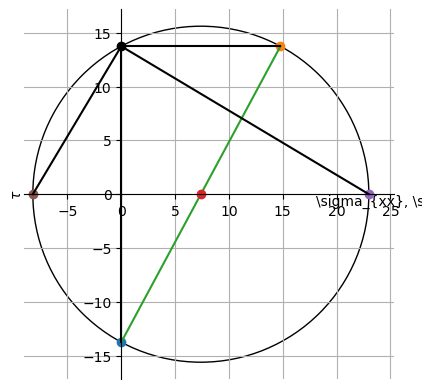

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

x_CD = 1.8
x_BC = 2.6
x_AB = 2.2
F = 10
q = 10
h = 0.300
b = 0.100
tl = 0.004
tf = 0.012

Ar = h* tl * 2 + b * tf * 2
print('Oppervlakte=',Ar)

Izz = 1/12 * tl * h **3 * 2 + 1/12 * b * tf **3 * 2 + 2 * b * tf * (h/2) **2

print("Buigtraagheidsmoment=",Izz)

M_B = -F*x_AB
M_C = -F*(x_AB+x_BC)+q*x_BC*0.5*x_BC
M_D = -F*(x_AB+x_BC+x_CD)+q*x_BC*(0.5*x_BC+x_CD)
V_B = -F
V_C = -F+q*x_BC

print("M_B=",M_B," , M_C=",M_C,',M_D = ',M_D,', V_B=',V_B,', V_C=',V_C)

#hoekpunt, midden

S_A = b * tf * h / 2
S_B = b * tf * h / 2 + 2 * tl * h/2 * h/4
S_E = b * tf * h / 2 + 2 * tl * h/4 * h/8*3
print('Statisch moment A',S_A,', B=',S_B)
tau_Ab = (V_C*1e3 * S_A )/ (tf*Izz)
tau_Ao = (V_C*1e3 * S_A )/ (tl*Izz)
tau_B = (V_C*1e3 * S_B )/ (tl*Izz)
tau_E = (V_C*1e3 * S_E )/ (tl*Izz)

print('Schuifspanning buiging tau_Ab=',tau_Ab,', tau_A0 =',tau_Ao,', tau_B =',tau_B,', tau_E =',tau_E)

sigma_buiging = - M_C*1e3 * (h/4) / Izz
print('sigma_buiging=',sigma_buiging)

tau = tau_E / 1e6
sigma_x = sigma_buiging / 1e6
sigma_z = 0

sigma_min = (sigma_z+sigma_x)/2-np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
sigma_max = (sigma_z+sigma_x)/2+np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
alpha = np.arctan(2*tau/(sigma_z-sigma_x))/2
tau_max = np.sqrt(((sigma_z-sigma_x)/2)**2+tau**2)
print('sigma_min=',sigma_min)
print('sigma_max=', sigma_max)
#print(np.rad2deg(alpha_tau))


plt.figure()
ax = plt.gca()
ax.set_aspect('equal')
ax.spines['right'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['left'].set_position('zero')
ax.spines['top'].set_color('none')
plt.grid()
if sigma_min<0:
    plt.xlim([1.1*sigma_min,1.1*sigma_max])
else:
    plt.xlim([0.7*sigma_min,1.1*sigma_max])
plt.ylim([-1.1*tau_max,1.1*tau_max])
plt.xlabel('\sigma_{xx}, \sigma_{zz}}')
ax.xaxis.set_label_coords(1.05, 0.5)
ax.yaxis.set_label_coords(0,0.95)
plt.ylabel(r'$\tau$')
plt.plot(sigma_z,-tau,marker='o')
plt.plot(sigma_x,tau,marker='o')
plt.plot([sigma_z,sigma_x],[-tau,tau])
plt.plot((sigma_x+sigma_z)/2,0,marker='o')
circle1 = plt.Circle([(sigma_x+sigma_z)/2,0],np.sqrt(((sigma_x-sigma_z)/2)**2+tau**2),fill=False)
ax.add_artist(circle1)
plt.plot(sigma_max,0,marker='o')
plt.plot(sigma_min,0,marker='o')
plt.plot([sigma_z,sigma_z],[+tau,-tau],color='black')
plt.plot([sigma_z,sigma_x],[tau,tau],color='black')
plt.plot(sigma_z,tau,marker='o',color='black')
plt.plot([sigma_min,sigma_z],[0,tau],color='black')
plt.plot([sigma_z,sigma_max],[tau,0],color='black')

s_v = np.sqrt(sigma_min**2-sigma_min*sigma_max+sigma_max**2)
print('vloeispanning =',s_v)
plt.show()